# AI Lab Assignment: Regression Models

Objective: You will apply regression techniques to predict a target variable using various classical AI models. The dataset remains the same (Top 1000 IMDb Movies),
but now your task is to train models to predict a selected column based on relevant features.

## Scenario

You are a data scientist at DaciaVision Analytics. After completing the initial data preprocessing and feature engineering phase, your team is now tasked with building
predictive models to forecast a key numerical variable of interest. Your goal is to analyze different regression models and compare their performance.

## Part 1: Selecting the Target Variable or Dependent variable 

Choose a numerical column from the dataset that you believe is the best to predict based on available features.

- Justify your selection using data analysis and visualization;
- Show correlations between this target variable and other potential features.

Let us import some necessary libraries first

In [1]:
import numpy as np  # Numerical computing
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced data visualization
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import StandardScaler  # Data scaling
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.tree import DecisionTreeRegressor # Decision tree model
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from xgboost import XGBRegressor # XGBRegressor model
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score  # Evaluation metrics
from sklearn.model_selection import cross_val_predict # for cross-validating the data
from sklearn.preprocessing import PolynomialFeatures # for adding degrees to Linear Regression
from sklearn.pipeline import make_pipeline

**Correlation** analysis is a statistical method used to measure the strength and direction of the relationship between 2 numerical variables. It helps determine how **changes** in one variable are associated with **changes** in another.

Let us load our "imdb_top_1000_processed.csv" file in a dataset and see the first 10 rows of our dataset.

In [2]:
df = pd.read_csv("imdb_top_1000_processed.csv")

In [3]:
df.head(10)

Series_Title  \
0                     12 Angry Men   
1  Il buono, il brutto, il cattivo   
2                     Gisaengchung   
3                   Cidade de Deus   
4    Sen to Chihiro no kamikakushi   
5                  La vita  bella   
6             Shichinin no samurai   
7                         Whiplash   
8                 The Intouchables   
9                      The Pianist   

                                            Overview            Director  \
0  A jury holdout attempts to prevent a miscarria...        Sidney Lumet   
1  A bounty hunting scam joins two men in an unea...        Sergio Leone   
2  Greed and class discrimination threaten the ne...        Bong Joon Ho   
3  In the slums of Rio, two kids' paths diverge a...  Fernando Meirelles   
4  During her family's move to the suburbs, a sul...      Hayao Miyazaki   
5  When an open-minded Jewish librarian and his s...     Roberto Benigni   
6  A poor village under attack by bandits recruit...      Akira Kurosawa   
7  A promising young drummer enrolls at a cut-thr...     Damien Chazelle   
8  After he becomes a quadriplegic from a paragli...     Olivier Nakache   
9  A Polish Jewish musician struggles to survive ...      Roman Polanski   

             Star1                Star2              Star3  \
0      Henry Fonda          Lee J. Cobb      Martin Balsam   
1   Clint Eastwood          Eli Wallach      Lee Van Cleef   
2     Kang-ho Song         Lee Sun-kyun      Cho Yeo-jeong   
3       Ktia Lund  Alexandre Rodrigues    Leandro Firmino   
4    Daveigh Chase    Suzanne Pleshette         Miyu Irino   
5  Roberto Benigni    Nicoletta Braschi  Giorgio Cantarini   
6   Toshir Mifune      Takashi Shimura     Keiko Tsushima   
7     Miles Teller         J.K. Simmons    Melissa Benoist   
8    ric Toledano      Franois Cluzet            Omar Sy   
9     Adrien Brody   Thomas Kretschmann       Frank Finlay   

                  Star4  Released_Year  Certificate   Runtime  ...   Mystery  \
0          John Fiedler      -1.614583    -0.716326 -0.985624  ... -0.345033   
1          Aldo Giuffr      -1.203222     1.735177  1.412753  ... -0.345033   
2          Choi Woo-sik       1.219236     1.735177  0.342708  ... -0.345033   
3  Matheus Nachtergaele       0.442221     1.735177  0.268911  ... -0.345033   
4          Rumi Hiiragi       0.396514    -0.716326  0.084421  ... -0.345033   
5       Giustino Durano       0.213687    -0.716326 -0.247662  ... -0.345033   
6      Yukiko Shimazaki      -1.751703    -0.716326  3.110066  ... -0.345033   
7           Paul Reiser       0.990702     1.735177 -0.616643  ... -0.345033   
8            Anne Le Ny       0.853582     0.509426 -0.395255  ... -0.345033   
9            Emilia Fox       0.442221    -0.716326  1.006873  ... -0.345033   

    Romance    Sci-Fi     Sport  Thriller       War   Western  Is_Short_Film  \
0 -0.406558 -0.235349 -0.161867 -0.394636 -0.228558 -0.147442       1.021508   
1 -0.406558 -0.235349 -0.161867 -0.394636 -0.228558  6.782330      -0.978945   
2 -0.406558 -0.235349 -0.161867  2.533980 -0.228558 -0.147442      -0.978945   
3 -0.406558 -0.235349 -0.161867 -0.394636 -0.228558 -0.147442      -0.978945   
4 -0.406558 -0.235349 -0.161867 -0.394636 -0.228558 -0.147442      -0.978945   
5  2.459675 -0.235349 -0.161867 -0.394636 -0.228558 -0.147442       1.021508   
6 -0.406558 -0.235349 -0.161867 -0.394636 -0.228558 -0.147442      -0.978945   
7 -0.406558 -0.235349 -0.161867 -0.394636 -0.228558 -0.147442       1.021508   
8 -0.406558 -0.235349 -0.161867 -0.394636 -0.228558 -0.147442       1.021508   
9 -0.406558 -0.235349 -0.161867 -0.394636 -0.228558 -0.147442      -0.978945   

   Is_Long_Film  Genre_Count  
0     -0.987314    -0.665048  
1      1.012848    -2.068818  
2      1.012848     0.738721  
3      1.012848    -0.665048  
4      1.012848     0.738721  
5     -0.987314     0.738721  
6      1.012848     0.738721  
7     -0.987314    -0.665048  
8     -0.987314     0.738721  
9      1.01

We have 36 columns, from which 29 are numerical and 7 are strings features.

So let us see in a heatmap how our numerical fetaures depend on eachoder.

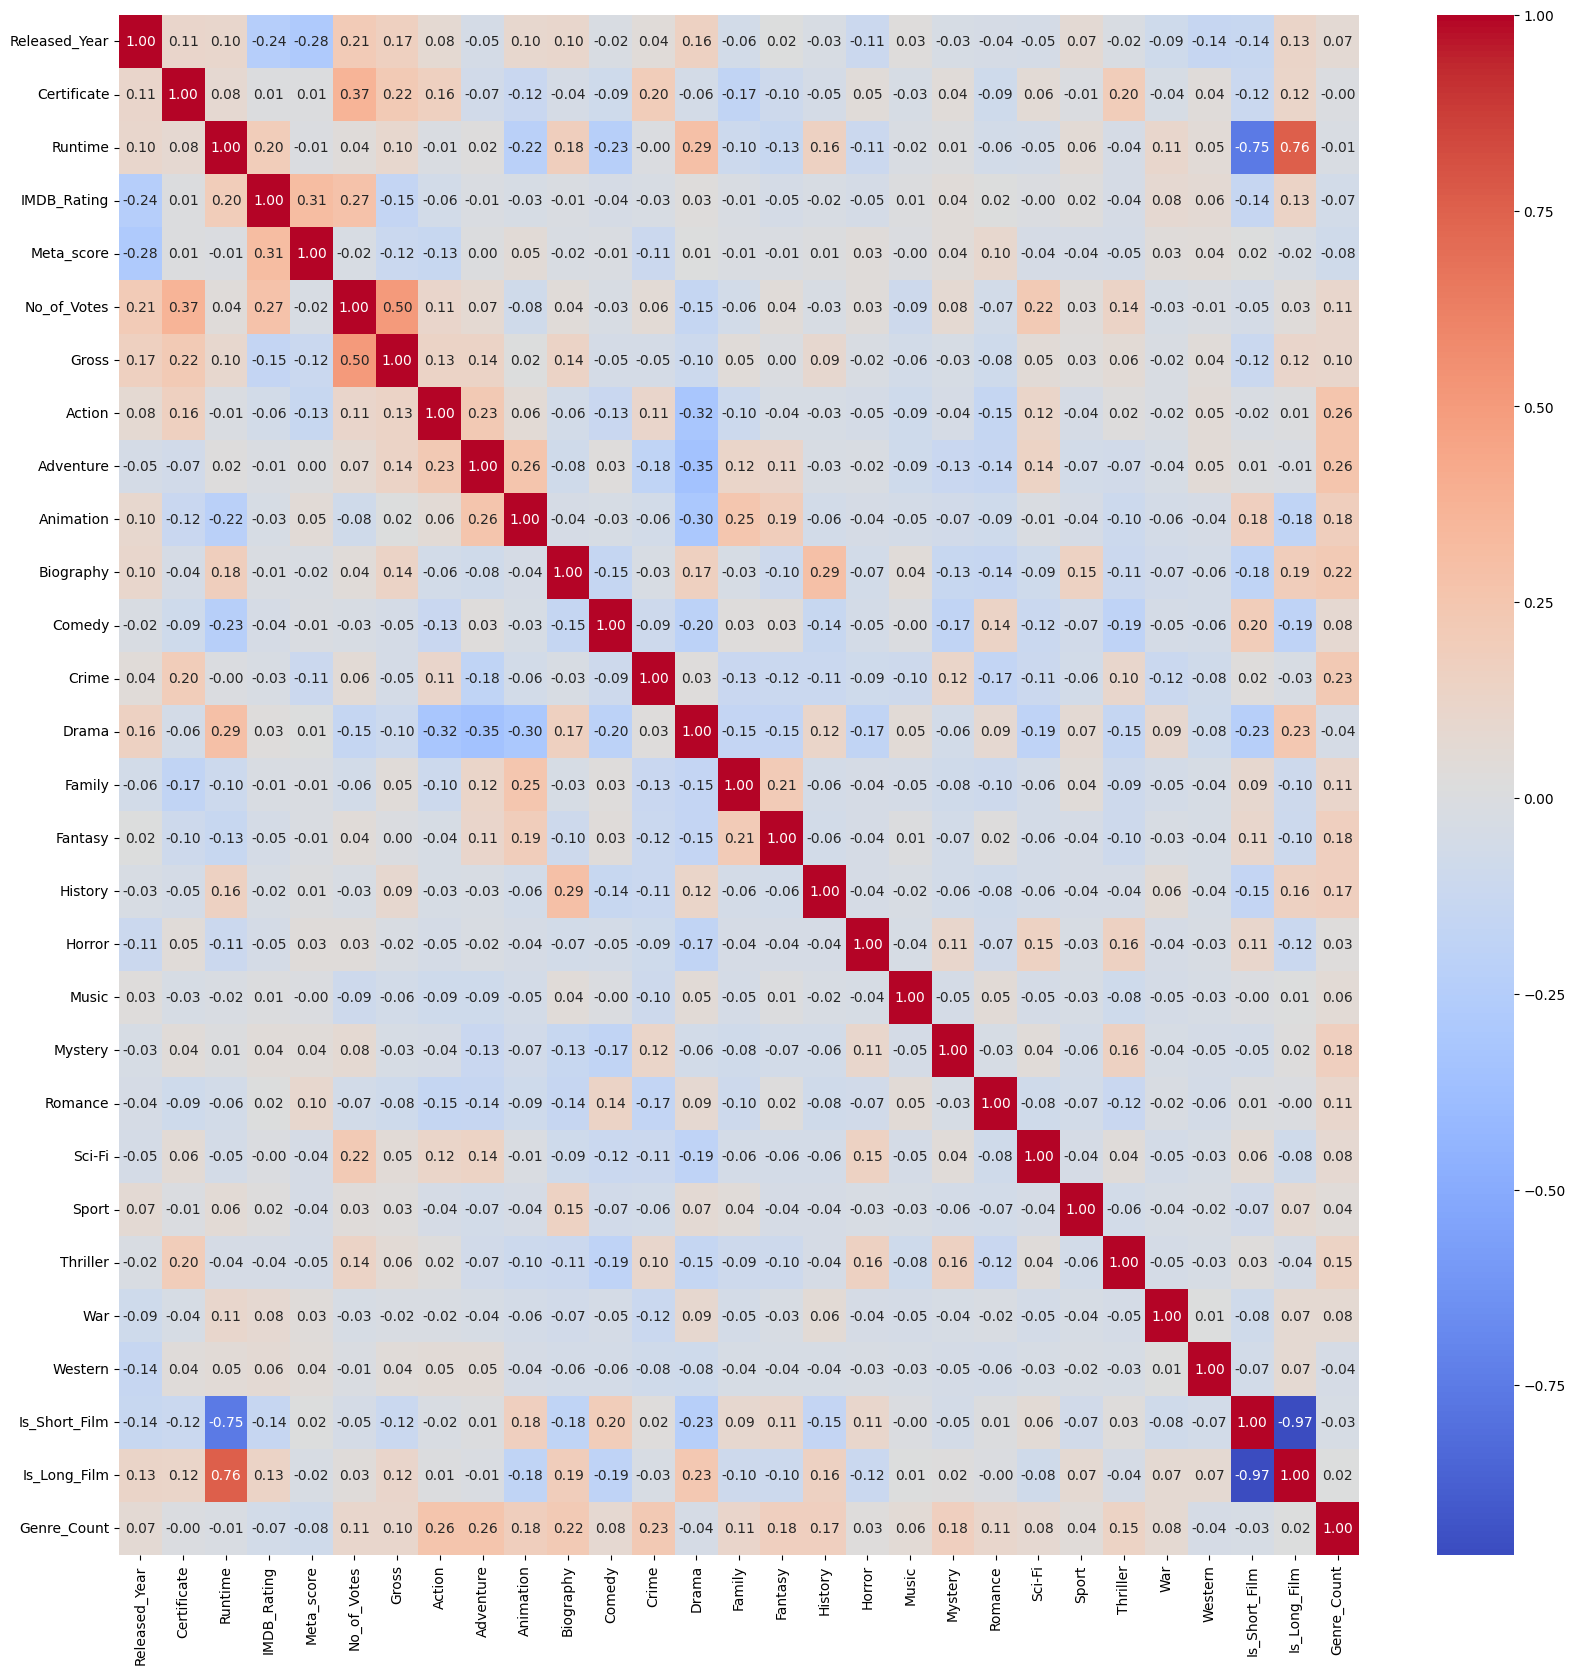

In [4]:
df_copy = df.copy()

df_copy.drop(columns=["Series_Title","Overview","Director","Star1","Star2","Star3","Star4"], inplace=True)
corr_matrix = df_copy.corr()

plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

Let us see top 5 features with the most correlations overall

In [5]:
corr_matrix = df.corr(numeric_only=True)  # take the corr_matrix from before

#use absolute values of correlation (ignoring sign) - because for example -0.7 and 0.7 would cancel out otherwise and we want to avoid that
corr_abs_sums = corr_matrix.abs().sum()

#get top 5 most strongly connected features
top_5_abs_features = corr_abs_sums.sort_values(ascending=False).head(10)

print("Top 5 features by total absolute correlation:")
print(top_5_abs_features)


Top 5 features by total absolute correlation:
Drama            5.044156
Is_Short_Film    4.988322
Is_Long_Film     4.977939
Runtime          4.916234
Genre_Count      3.989278
No_of_Votes      3.972907
Biography        3.946376
Animation        3.910532
Adventure        3.777200
Gross            3.740734
dtype: float64


It is important to look at the heatmap now and draw some conclusions, taking into consideration also the statistics:
- **Drama** is just an encoded value standardized (it is actually a categorical value), so it is not really suitable for Linear Regression
- **Is_Short_Film** and **Is_Long_Film** are highly related to eachoder (resulting in a bigger sum) + they are also categorical , not suitable for LR
- **Runtime** is actually a good choice, because :
  1. It is not categorical (it can be linearized)
  2. Depends quite a lot on Bibliografy, Animation and Others, not only on Is_Short_Film or Is_Long_Film

# Part 2: Feature Selection & Engineering

- Use statistical methods (correlation matrix, feature importance) to select relevant features.
- Apply any additional transformations, if necessary, to improve predictive performance.
- Clearly document your choices and explain why specific features are included or excluded.


Let us see specific correlations for the picked target **Runtime** feature

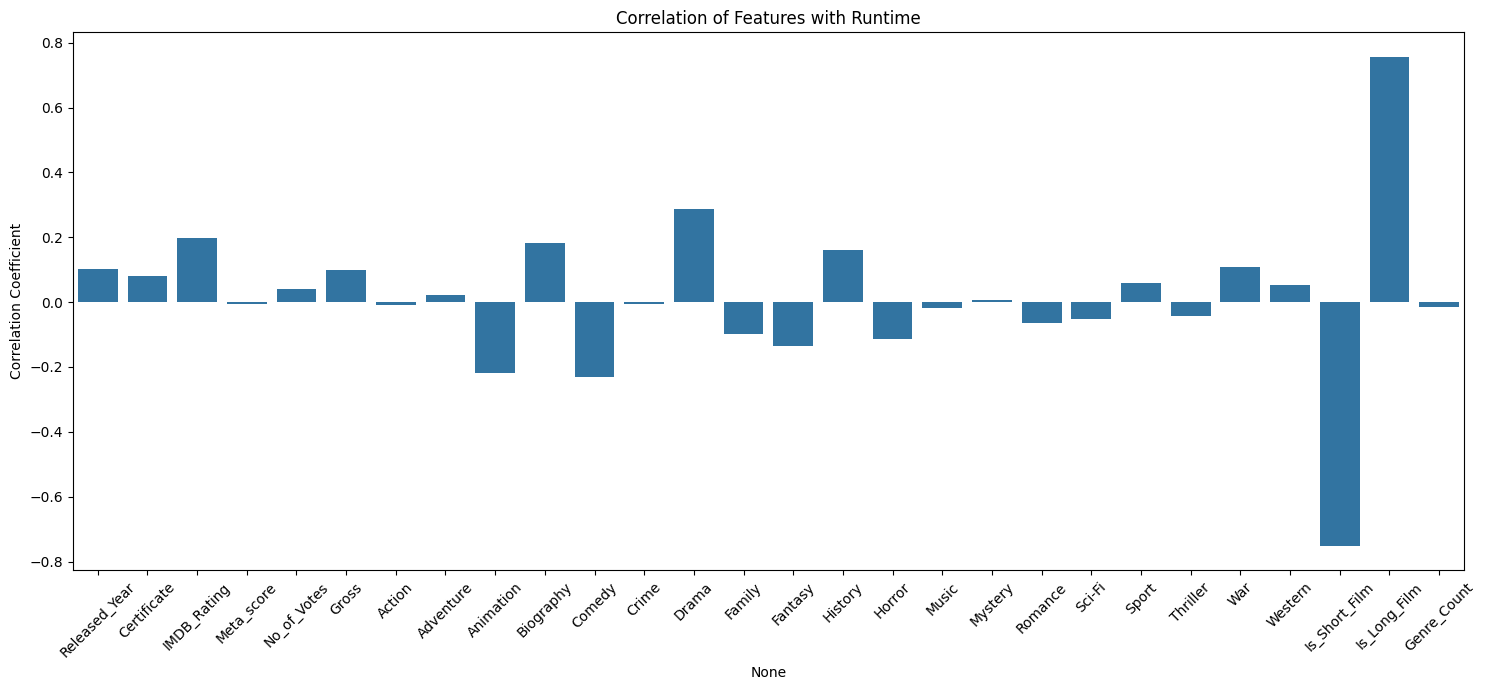

In [6]:
corr_matrix = df.corr(numeric_only=True)

corr_with_runtime = corr_matrix['Runtime'].drop('Runtime')  # exclude self-correlation

plt.figure(figsize=(15, 7))
sns.barplot(x=corr_with_runtime.index, y=corr_with_runtime.values)
plt.xticks(rotation=45)
plt.title('Correlation of Features with Runtime')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


We can pick those with a correlation bigger that 0.2 (the features will be much more important in predicting the target) and do not take the rest into consideration, because they do not bring any great benefits ( they are not so important to predicting the target, because every feature in this category says very little about the target).

In [7]:
selected_corr_features = corr_with_runtime[abs(corr_with_runtime) >= 0.2].index.tolist()
print("Selected based on correlation:", selected_corr_features)

Selected based on correlation: ['Animation', 'Comedy', 'Drama', 'Is_Short_Film', 'Is_Long_Film']


Now, we can form a dataset copy with the selected numerical features : ['Animation', 'Comedy', 'Drama', 'Is_Short_Film', 'Is_Long_Film'] + strings features.  
Of course, "Is_Short_Film" can be dropped, because it self-excludes with "Is_Long_Film", so we can improve performance in this way.

In [8]:
df_selected = df[["Series_Title","Overview","Director","Star1","Star2","Star3","Star4",'Animation', 'Comedy', 'Drama', 'Is_Short_Film']].copy()
df_selected.head(5)


Series_Title  \
0                     12 Angry Men   
1  Il buono, il brutto, il cattivo   
2                     Gisaengchung   
3                   Cidade de Deus   
4    Sen to Chihiro no kamikakushi   

                                            Overview            Director  \
0  A jury holdout attempts to prevent a miscarria...        Sidney Lumet   
1  A bounty hunting scam joins two men in an unea...        Sergio Leone   
2  Greed and class discrimination threaten the ne...        Bong Joon Ho   
3  In the slums of Rio, two kids' paths diverge a...  Fernando Meirelles   
4  During her family's move to the suburbs, a sul...      Hayao Miyazaki   

            Star1                Star2            Star3                 Star4  \
0     Henry Fonda          Lee J. Cobb    Martin Balsam          John Fiedler   
1  Clint Eastwood          Eli Wallach    Lee Van Cleef          Aldo Giuffr   
2    Kang-ho Song         Lee Sun-kyun    Cho Yeo-jeong          Choi Woo-sik   
3      Ktia Lund  Alexandre Rodrigues  Leandro Firmino  Matheus Nachtergaele   
4   Daveigh Chase    Suzanne Pleshette       Miyu Irino          Rumi Hiiragi   

   Animation    Comedy     Drama  Is_Short_Film  
0  -0.254862 -0.554957  0.544018       1.021508  
1  -0.254862 -0.554957 -1.838174      -0.978945  
2  -0.254862  1.801940  0.544018      -0.978945  
3  -0.254862 -0.554957  0.544018      -0.978945  
4   3.923691 -0.554957 -1.838174      -0.978945

In [9]:
print(df_selected.shape)

(705, 11)


Finally, let us apply some dimensionaliy reduction, becuase this way we can help the model **run faster** and **prevent overfitting**.

PCA reduces the number of features while keeping most of the dataset's variance. Let us just keep 95% of the variance and get rid of unnecessary columns, that do not differ from others so much, so they do not bring any advantage and they just reduce the performance.

In [10]:
from sklearn.decomposition import PCA

#select numeric columns
numeric_cols = df_selected.select_dtypes(include='number').columns
non_numeric_df_selected = df_selected.select_dtypes(exclude='number')

pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
df_pca_array = pca.fit_transform(df_selected[numeric_cols]) # save the tranformations in
                                             # df_pca after applying the pca operation

# Convert PCA result to DataFrame
df_pca = pd.DataFrame(df_pca_array,
                      columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                      index=df_selected.index)
df_selected_pca = pd.concat([df_pca, non_numeric_df_selected], axis=1)

df_selected_pca.head(10)

PC1       PC2       PC3       PC4                     Series_Title  \
0  0.114837 -0.010461  1.288716 -0.195656                     12 Angry Men   
1 -0.258619 -0.624424 -1.464964 -1.451633  Il buono, il brutto, il cattivo   
2  0.284675  1.391300 -1.111986  1.145846                     Gisaengchung   
3  1.172148 -0.351182 -0.353488  0.070767                   Cidade de Deus   
4 -2.210201 -3.304086 -1.755498  1.075546    Sen to Chihiro no kamikakushi   
5 -0.772636  1.732021  0.530217  0.879422                  La vita  bella   
6  1.172148 -0.351182 -0.353488  0.070767             Shichinin no samurai   
7  0.114837 -0.010461  1.288716 -0.195656                         Whiplash   
8 -0.772636  1.732021  0.530217  0.879422                 The Intouchables   
9  1.172148 -0.351182 -0.353488  0.070767                      The Pianist   

                                            Overview            Director  \
0  A jury holdout attempts to prevent a miscarria...        Sidney Lumet   
1  A bounty hunting scam joins two men in an unea...        Sergio Leone   
2  Greed and class discrimination threaten the ne...        Bong Joon Ho   
3  In the slums of Rio, two kids' paths diverge a...  Fernando Meirelles   
4  During her family's move to the suburbs, a sul...      Hayao Miyazaki   
5  When an open-minded Jewish librarian and his s...     Roberto Benigni   
6  A poor village under attack by bandits recruit...      Akira Kurosawa   
7  A promising young drummer enrolls at a cut-thr...     Damien Chazelle   
8  After he becomes a quadriplegic from a paragli...     Olivier Nakache   
9  A Polish Jewish musician struggles to survive ...      Roman Polanski   

             Star1                Star2              Star3  \
0      Henry Fonda          Lee J. Cobb      Martin Balsam   
1   Clint Eastwood          Eli Wallach      Lee Van Cleef   
2     Kang-ho Song         Lee Sun-kyun      Cho Yeo-jeong   
3       Ktia Lund  Alexandre Rodrigues    Leandro Firmino   
4    Daveigh Chase    Suzanne Pleshette         Miyu Irino   
5  Roberto Benigni    Nicoletta Braschi  Giorgio Cantarini   
6   Toshir Mifune      Takashi Shimura     Keiko Tsushima   
7     Miles Teller         J.K. Simmons    Melissa Benoist   
8    ric Toledano      Franois Cluzet            Omar Sy   
9     Adrien Brody   Thomas Kretschmann       Frank Finlay   

                  Star4  
0          John Fiedler  
1          Aldo Giuffr  
2          Choi Woo-sik  
3  Matheus Nachtergaele  
4          Rumi Hiiragi  
5       Giustino Durano  
6      Yukiko Shimazaki  
7           Paul Reiser  
8            Anne Le Ny  
9            Emilia Fox

It seems like we are left with **the same exact number of features**, proof that our processing from before was done well

So it is better to remain with the orginal values, to **enhance interpretibility**.

Finally, we only need **numerical values** for training, so let us keep them in a new dataset.
And do not forget to add the **TARGET VALUE -> Runtime**.

In [11]:
df_final = df_selected.copy()

df_final.drop(columns=["Series_Title","Overview","Director","Star1","Star2","Star3","Star4"], inplace=True)

# Add Runtime column from original df
df_final["Runtime"] = df["Runtime"]

In [12]:
df_final.head(5)

Animation    Comedy     Drama  Is_Short_Film   Runtime
0  -0.254862 -0.554957  0.544018       1.021508 -0.985624
1  -0.254862 -0.554957 -1.838174      -0.978945  1.412753
2  -0.254862  1.801940  0.544018      -0.978945  0.342708
3  -0.254862 -0.554957  0.544018      -0.978945  0.268911
4   3.923691 -0.554957 -1.838174      -0.978945  0.084421

# Part 3: Training Regression Models

Train and evaluate five different regression models:
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression

For each model:
- Train it using the selected features.
- Optimize hyperparameters where applicable.
- Evaluate its performance using relevant metrics (e.g., RMSE, MAE, R-squared).
- Compare model performances using a table and visualization (e.g., bar chart of RMSE values).
- Explain their inner workings, how parameters impact predictions, and how different features contribute to the outcome

## 3.1. Linear Regression

Let us define X - our input data and y - labels or independent data.

In [13]:
X = df_final[['Animation','Comedy',	'Drama','Is_Short_Film']]
y = df_final['Runtime']

Let us ensure the robustness of our models for cross-validating the data. For every model type, we will split the input data randomply into 5 batches and train the model this way.

In [14]:
model_LR = LinearRegression()

y_pred_LR = cross_val_predict(model_LR, X, y, cv=5)

This is a method to model the relationship between a dependent variable y and one or more independent variables x.
The goal is to find the best-fitting line that minimizes the difference between predicted and actual values.

- **Root Mean Squared Error (RMSE)**: Measures the sqrt of average squared difference between actual and predicted values. A lower RMSE indicates a better fit.
- **R-squared (R²) Score**: Represents how well the independent variables explain the variance in the target variable. A value closer to 1 indicates a better fit.

  The formula for R² is:
  
$$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $$
  
Where:
$$
y_i \text{ are the actual values}
$$
$$
\hat{y}_i \text{ are the predicted values}
$$
$$
\bar{y} \text{ is the mean of the actual values}
$$

In [15]:
mae_LR = mean_absolute_error(y, y_pred_LR)

rmse_LR = root_mean_squared_error(y, y_pred_LR)  

r2_LR = r2_score(y, y_pred_LR)

# Print results
print(f"MAE: {mae_LR:.4f}")
print(f"RMSE: {rmse_LR:.4f}")
print(f"R²: {r2_LR:.4f}")

MAE: 0.4702
RMSE: 0.6518
R²: 0.5752


The results are quite good, MAE < 0.5, R² is 0.57, which is a good value.
Let let us see also some visualizations.

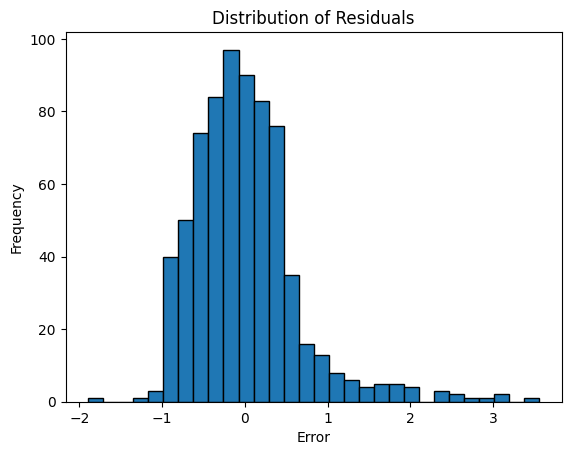

In [16]:
residuals = y - y_pred_LR
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

Taking into consideration that the movie dataset is not 100% linear, and that we have already removed **outliers**, **normalized** and **scaled** our data in the data processing part, the model performs quite well (most of the residues are "normally distributed" around 0).

### Feature importance

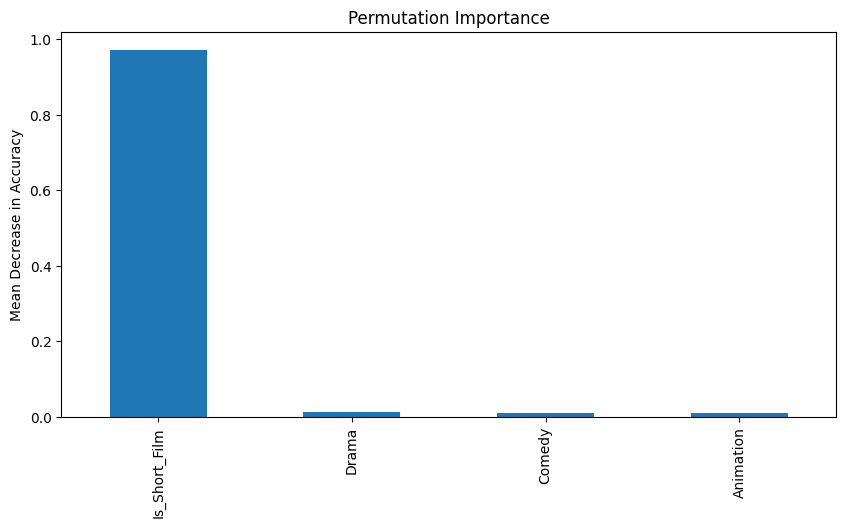

In [17]:
# Refit model on the entire dataset
model_LR.fit(X, y) # needed before applying permutaion_feature importance

from sklearn.inspection import permutation_importance

# Use trained model and test set
perm_importance_result_LR = permutation_importance(model_LR, X, y, n_repeats=10, random_state=42)

# Plot
pd.Series(perm_importance_result_LR.importances_mean, index=X.columns).sort_values(ascending=False).plot(
    kind='bar', title='Permutation Importance', figsize=(10, 5))
plt.ylabel("Mean Decrease in Accuracy")
plt.show()

From the permutation importance plot, we see that **Is_Short_Film** and **Drama** are the most influential features in predicting the Runtime.
Shuffling **Is_Short_Film** leads to the largest drop in model accuracy, indicating the model heavily relies on this feature.
Comedy and Animation have smaller effects, suggesting they contribute less to the prediction.

This analysis helps us understand which variables the model depends on most and supports their relevance in our dataset.

We can see that, expectedly, **Is_Short_Film** is the most influencial on the outcome (we can notice that from the feature CORRELATION part).

## 3.2.Decision Tree Regression

A **Decision Tree** is a tree-like model used for classification and regression.
It splits data based on feature values at different decision nodes.
Growing the tree:
1. Start with the full dataset.
2. Find the best split using MSE
3. Divide dataset into 2 child nodes
4. Repeat the process recursevely until stopping criteria are met.

### Maximum depth 
- limits how deep the tree can grow.
- low values (e.g. 2-4) → simpler trees, less likely to overfit.
- high values (e.g. 10+) → more complex trees, more likely to overfit.

### Minimum samples per leaf
- the minimum number of samples required at a leaf node.
- helps prevent leaves from being too specific or based on noise.
- higher values (e.g., 5–20) force the model to generalize more.

Let us try more values for these parameters and see which models perform the best.

In [18]:
errors_tree_model = []  # array for retaining the errorss and essentail parameters
for depth in [4, 6, 8,10]:
    for min_leaf in [3,5, 7, 10, 11, 15, 20]:
        tree_model = DecisionTreeRegressor(criterion='squared_error', max_depth=depth, min_samples_leaf=min_leaf, random_state=1)
        y_pred_tree_model = cross_val_predict(tree_model, X, y, cv=5) # predict using cv
        
        mae_tree_model = mean_absolute_error(y, y_pred_tree_model)
        rmse_tree_model= root_mean_squared_error(y, y_pred_tree_model)  
        r2_tree_model = r2_score(y, y_pred_tree_model)
        
        print(f"max_depth={depth}, min_samples_leaf={min_leaf} => R²: {r2_tree_model:.3f}, MAE: {mae_tree_model:.4f}, RMSE: {rmse_tree_model:.4f}")

        errors_tree_model.append({
            'max_depth': depth,    # append the errors and the important parameters, to see afterwards what we choose
            'min_samples_leaf': min_leaf,
            'RMSE': rmse_tree_model,
            'R2' : r2_tree_model,
            'MAE' : mae_tree_model
        })

max_depth=4, min_samples_leaf=3 => R²: 0.573, MAE: 0.4737, RMSE: 0.6538
max_depth=4, min_samples_leaf=5 => R²: 0.572, MAE: 0.4746, RMSE: 0.6541
max_depth=4, min_samples_leaf=7 => R²: 0.573, MAE: 0.4740, RMSE: 0.6537
max_depth=4, min_samples_leaf=10 => R²: 0.573, MAE: 0.4743, RMSE: 0.6536
max_depth=4, min_samples_leaf=11 => R²: 0.574, MAE: 0.4737, RMSE: 0.6531
max_depth=4, min_samples_leaf=15 => R²: 0.572, MAE: 0.4759, RMSE: 0.6544
max_depth=4, min_samples_leaf=20 => R²: 0.572, MAE: 0.4759, RMSE: 0.6544
max_depth=6, min_samples_leaf=3 => R²: 0.573, MAE: 0.4737, RMSE: 0.6538
max_depth=6, min_samples_leaf=5 => R²: 0.572, MAE: 0.4746, RMSE: 0.6541
max_depth=6, min_samples_leaf=7 => R²: 0.573, MAE: 0.4740, RMSE: 0.6537
max_depth=6, min_samples_leaf=10 => R²: 0.573, MAE: 0.4743, RMSE: 0.6536
max_depth=6, min_samples_leaf=11 => R²: 0.574, MAE: 0.4737, RMSE: 0.6531
max_depth=6, min_samples_leaf=15 => R²: 0.572, MAE: 0.4759, RMSE: 0.6544
max_depth=6, min_samples_leaf=20 => R²: 0.572, MAE: 0.475

To plot all the errors from before, we can use a barchart. But first we need to transform our previous array in a dataframe.

In [19]:
errors_df = pd.DataFrame(errors_tree_model)
errors_df['Params'] = errors_df.apply(lambda row: f"depth={row['max_depth']}, leaf={int(row['min_samples_leaf'])}", axis=1)

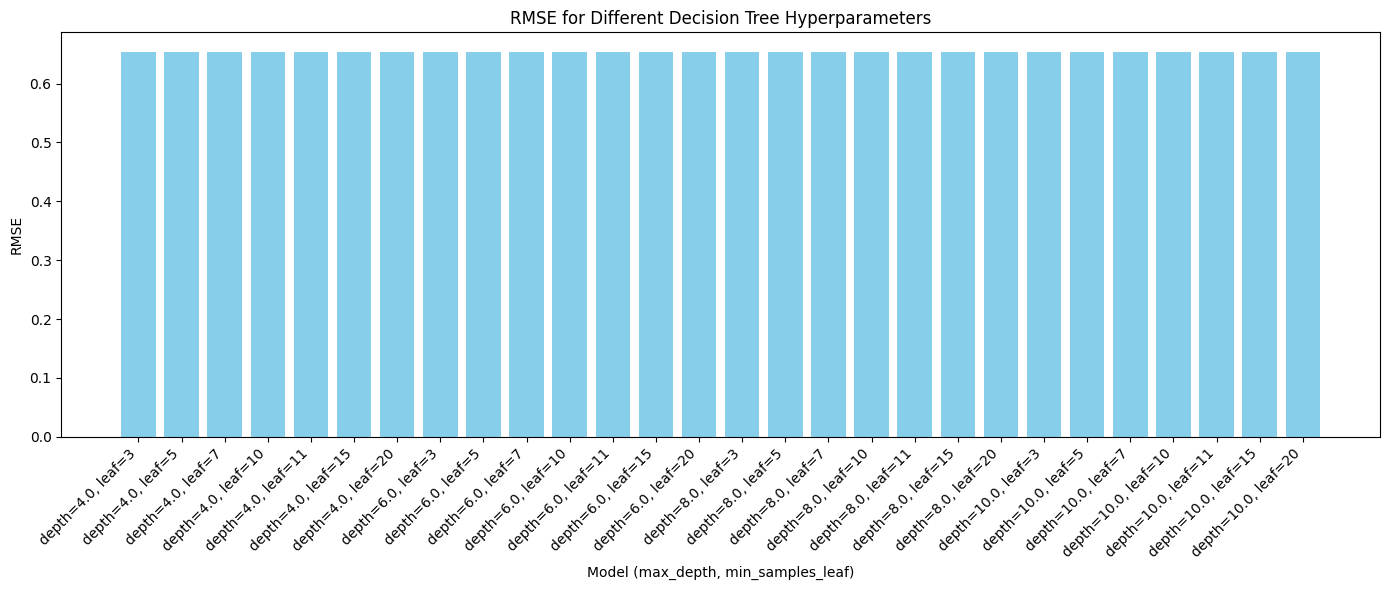

In [20]:
plt.figure(figsize=(14, 6))
plt.bar(errors_df['Params'], errors_df['RMSE'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('RMSE for Different Decision Tree Hyperparameters')
plt.xlabel('Model (max_depth, min_samples_leaf)')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


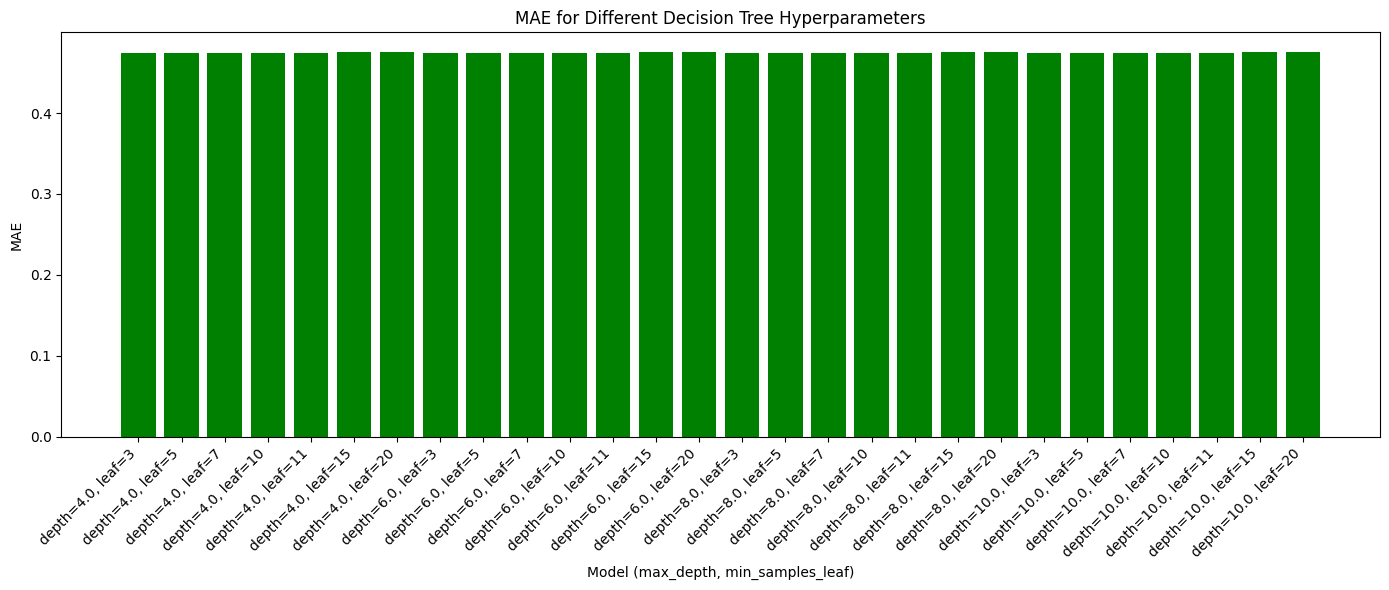

In [21]:
plt.figure(figsize=(14, 6))
plt.bar(errors_df['Params'], errors_df['MAE'], color='green')
plt.xticks(rotation=45, ha='right')
plt.title('MAE for Different Decision Tree Hyperparameters')
plt.xlabel('Model (max_depth, min_samples_leaf)')
plt.ylabel('MAE')
plt.tight_layout()
plt.show()

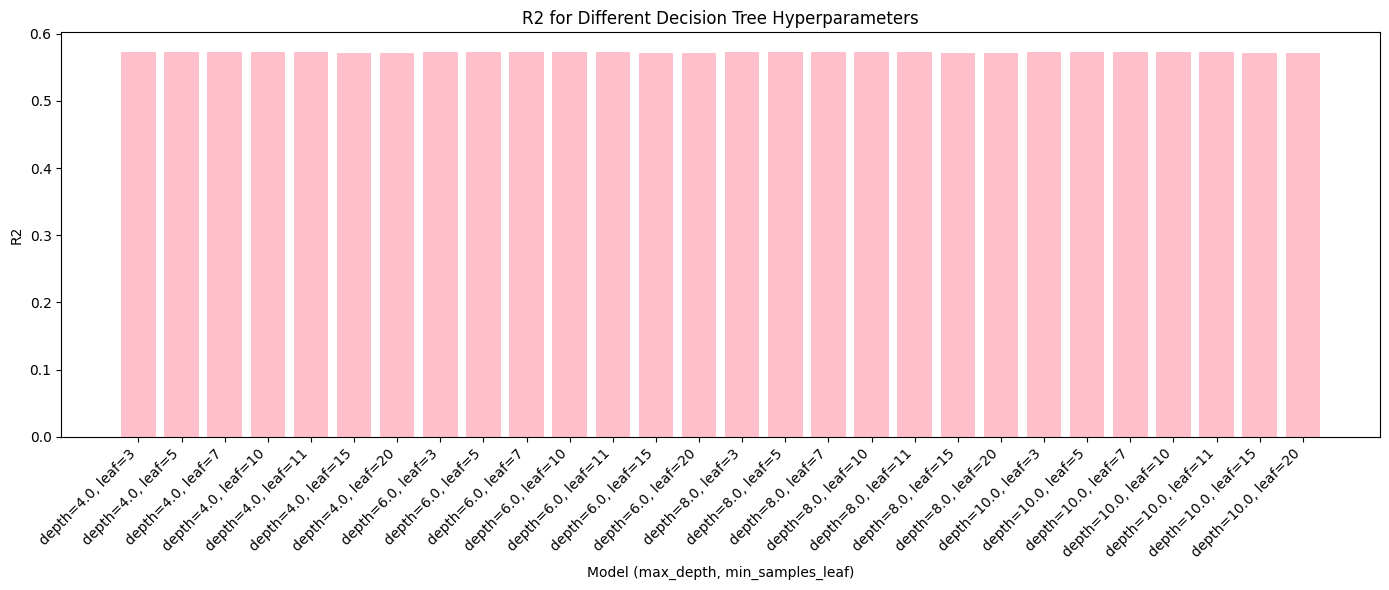

In [22]:
plt.figure(figsize=(14, 6))
plt.bar(errors_df['Params'], errors_df['R2'], color='pink')
plt.xticks(rotation=45, ha='right')
plt.title('R2 for Different Decision Tree Hyperparameters')
plt.xlabel('Model (max_depth, min_samples_leaf)')
plt.ylabel('R2')
plt.tight_layout()
plt.show()

Seems like :
max_depth = 4
min_samples_leaf = 11   is a good choice in this case (it does not really matter, the errors are almost the same), considering the formulas and their explanations.

In [23]:
#Initialize Decision Tree 
tree_model = DecisionTreeRegressor(
    criterion='squared_error',   # MSE split
    max_depth=4,                 # limits tree depth
    min_samples_leaf=11,          # minim samples per leaf
    random_state=1
)

#train the model on cv data
y_pred_tree_model = cross_val_predict(tree_model, X, y, cv=5)


#Evaluate errors
rmse_tree_model = root_mean_squared_error(y, y_pred_tree_model)
mae_tree_model = mean_absolute_error(y, y_pred_tree_model)
r2_tree_model = r2_score(y, y_pred_tree_model)

print(f"MAE: {mae_tree_model:.3f}")
print(f"RMSE: {rmse_tree_model:.3f}")
print(f"R² Score: {r2_tree_model:.3f}")


MAE: 0.474
RMSE: 0.653
R² Score: 0.574


We can notice that the tree performance is quite similar to the Linear Regression.

### Pruning - remove unnecessary branches

First, let us see the complexity parameter, which will help us decide **how much we want to prune from the tree**.
This **alpha** parameters gives us :
- a more complex (unchanged) tree if it is low
- a more pruned (changed) tree if it is high.

In [24]:
path = tree_model.cost_complexity_pruning_path(X, y)
alphas = path.ccp_alphas[:-1] # the last alpha gives us a trivial tree -> not useful

Of course, we need to keep a balance between tree complexity and model accuracy, so let us see how does a decision tree with **different values of alpha** perform.

Let us see how the values of alpha affect R2 score.

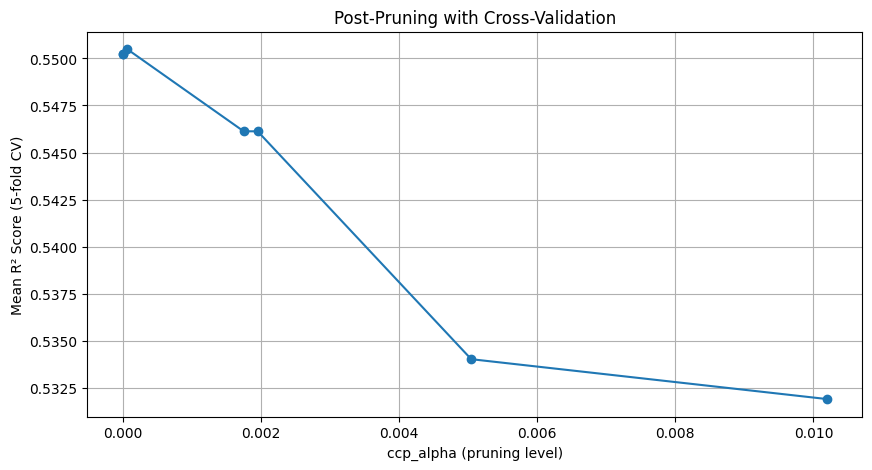

In [25]:
from sklearn.model_selection import cross_val_score

models = []
mean_r2_scores = []

for alpha in alphas:
    #1.create model with current alpha
    model = DecisionTreeRegressor(random_state=1, ccp_alpha=alpha)
    
    # 2.cross-validate the model
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold R² scores
    
    # 3. Store mean R²
    mean_r2_scores.append(scores.mean())
    models.append(model)

# Plot mean R² for each alpha
plt.figure(figsize=(10,5))
plt.plot(alphas, mean_r2_scores, marker='o')
plt.xlabel("ccp_alpha (pruning level)")
plt.ylabel("Mean R² Score (5-fold CV)")
plt.title("Post-Pruning with Cross-Validation")
plt.grid(True)
plt.show()



We can see that the best alpha would be somewhere right after 0, taking into consideraton R² Score.
Let us form a new tree and see the error results, similar to our previous approach with the initial, unpruned tree.

In [26]:
best_alpha = alphas[np.argmax(mean_r2_scores)] # pick thealpha that offers the highest R2 value

tree_model_pruned = DecisionTreeRegressor(random_state=1, ccp_alpha=best_alpha)
tree_model_pruned.fit(X, y)           # train the new pruned tree
y_pred_tree_model_p = tree_model_pruned.predict(X)

# Evaluate the errors
rmse_tree_model_p = root_mean_squared_error(y, y_pred_tree_model_p)
mae_tree_model_p = mean_absolute_error(y, y_pred_tree_model_p)
r2_tree_model_p = r2_score(y, y_pred_tree_model_p)

print(f"MAE: {mae_tree_model_p:.3f}")
print(f"RMSE: {rmse_tree_model_p:.3f}")
print(f"R² Score: {r2_tree_model_p:.3f}")

MAE: 0.460
RMSE: 0.638
R² Score: 0.593


Seems like pruning did help us, because all 3 errors are better now.

This visualization helps us see the errors better:

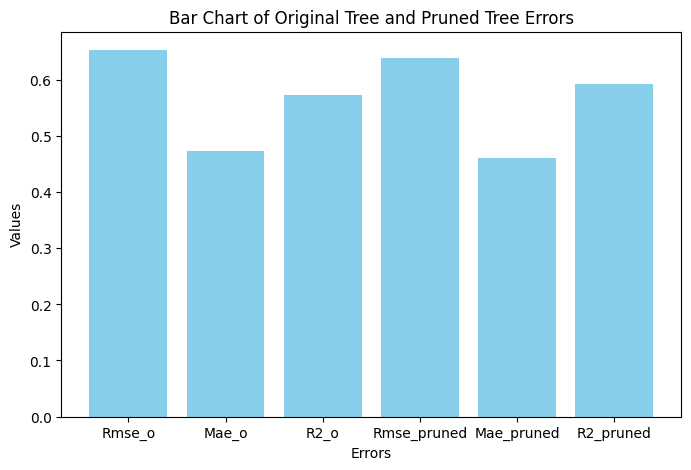

In [27]:
categories = ['Rmse_o', 'Mae_o', 'R2_o', 'Rmse_pruned', 'Mae_pruned', 'R2_pruned']
errors = [rmse_tree_model, mae_tree_model, r2_tree_model, rmse_tree_model_p, mae_tree_model_p, r2_tree_model_p]

# 2. Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, errors, color='skyblue')

# 3. Add labels and title
plt.xlabel("Errors")
plt.ylabel("Values")
plt.title("Bar Chart of Original Tree and Pruned Tree Errors")

# 4. Show chart
plt.show()

### Visualization of residuals

The resulted errors : 
- MAE: 0.460
- RMSE: 0.638
- R² Score: 0.593

are quite good and are even better, comparing with the Linear Regression ones.
Let us see how the residuals are distributed in this case.

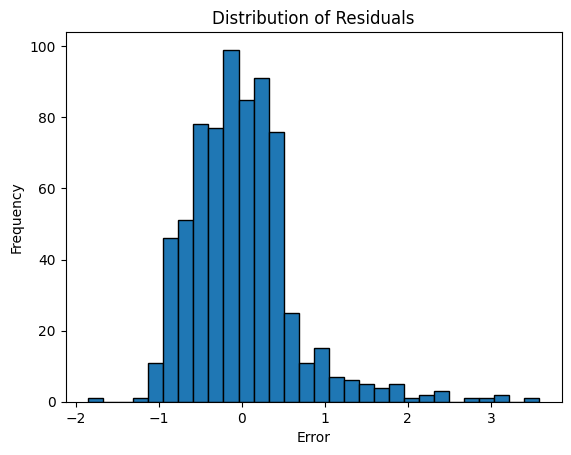

In [28]:
residuals = y - y_pred_tree_model_p
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

The residual plot looks good: most of the errors are around 0, with only a few outliers.
The disadvantage of this representation of the model is:
- if we change some values in the dataset, we have to restart the process of determining the infrastructure

Advantages:
- the tree is not that deep, so it avoids overfitting
- it generalizes well the predictions, because the minimum nr of values per leaf is >10

### Feature importance

Let us see how feature importance in distributed in this case.

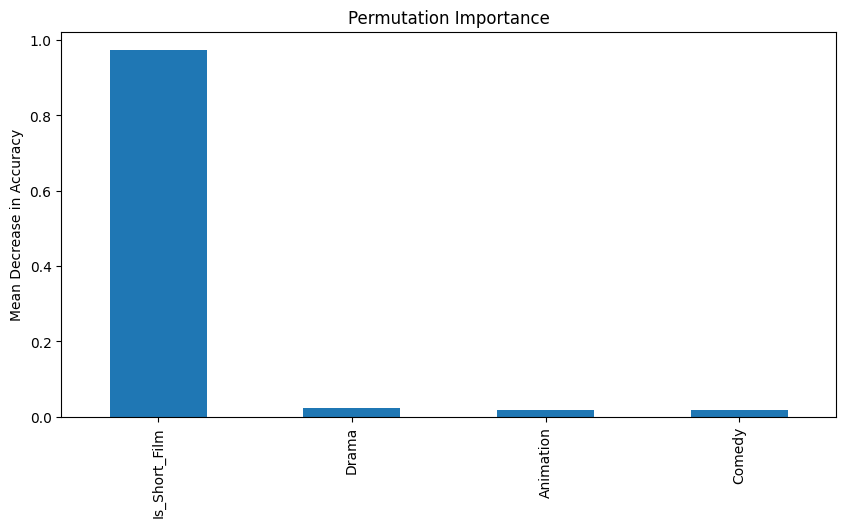

In [29]:
perm_importance_result_tree_model = permutation_importance(tree_model_pruned, X, y, n_repeats=10, random_state=42)

#plot
pd.Series(perm_importance_result_tree_model.importances_mean, index=X.columns).sort_values(ascending=False).plot(
    kind='bar', title='Permutation Importance', figsize=(10, 5))
plt.ylabel("Mean Decrease in Accuracy")
plt.show()

Similarly to the Linear Regression, **Is_Short_Film** matters the most here.

The notable difference is that all the other features matter twice as much and the importance is distributed more evenly , because the tree model destributes importance more evenly if multiple features help reduce impurity (MSE tree), and, interestingly, now Animation matters more than Comedy.

## 3.3. Random Forest Regression

A Random Forest is an ensemble of multiple decision trees that work together to improve accuracy and reduce overfitting.

Growing the forest:
1. **Bootstrap Sampling**: Randomly sample data points with replacement to create subsets.
2. **Train Decision Trees**: Each tree is trained on a different subset.
3. **Feature Randomness**: Each tree considers a random subset of features at each split.
4. **Aggregation of Predictions**: Final prediction is based on averaging values.

Parameters:
- **Number of trees (n estimators)**: More trees improve performance but increase computation time.
- **Max features**: Number of features to consider at each split (reduces correlation between trees).

Let us try more values for these parameters and see which models perform the best (for the rest of the parameters, we keep the tree structure from before).

For max_features, we have the option **None** (we let the trees grow fully) or **0.5** (we split in 2 features + 2 features), because **log2** or **sqrt** would be exactly like 0.5 (log2(4)=sqrt(4)=2).

In [30]:
errors_tree_model = []  # array for retaining the errorss and essentail parameters
for n_estimators_option in [20,50,100,150,200,250]:
    for max_features_option in [None,0.5]: 
        forest_model = RandomForestRegressor(
            max_features=max_features_option,    # max_features parameter for split
            n_estimators=n_estimators_option,       # Number of trees in the forest
            max_depth=4,            # Same depth as your tree
            min_samples_leaf=11,    # Same leaf size
            random_state=1
        )
        y_pred_forest = cross_val_predict(forest_model, X, y, cv=5)
        
        rmse_forest = root_mean_squared_error(y, y_pred_forest) # errors
        mae_forest = mean_absolute_error(y, y_pred_forest)
        r2_forest = r2_score(y, y_pred_forest)
        
        # print errors
        print(f" Random Forest Performance: for n_estimators {n_estimators_option} & max_features_option {max_features_option}") 
        print(f"MAE:  {mae_forest:.3f}")
        print(f"RMSE: {rmse_forest:.3f}")
        print(f"R²:   {r2_forest:.3f}")

        errors_tree_model.append({
            'max_features_option': max_features_option,    # append the errors and the important parameters, to see afterwards what we choose
            'n_estimators_option': n_estimators_option,
            'RMSE': rmse_forest,
            'R2' : r2_forest,
            'MAE' : mae_forest
        })


 Random Forest Performance: for n_estimators 20 & max_features_option None
MAE:  0.473
RMSE: 0.652
R²:   0.575
 Random Forest Performance: for n_estimators 20 & max_features_option 0.5
MAE:  0.467
RMSE: 0.655
R²:   0.571
 Random Forest Performance: for n_estimators 50 & max_features_option None
MAE:  0.472
RMSE: 0.653
R²:   0.574
 Random Forest Performance: for n_estimators 50 & max_features_option 0.5
MAE:  0.465
RMSE: 0.654
R²:   0.572
 Random Forest Performance: for n_estimators 100 & max_features_option None
MAE:  0.473
RMSE: 0.653
R²:   0.573
 Random Forest Performance: for n_estimators 100 & max_features_option 0.5
MAE:  0.465
RMSE: 0.656
R²:   0.570
 Random Forest Performance: for n_estimators 150 & max_features_option None
MAE:  0.474
RMSE: 0.653
R²:   0.574
 Random Forest Performance: for n_estimators 150 & max_features_option 0.5
MAE:  0.465
RMSE: 0.656
R²:   0.569
 Random Forest Performance: for n_estimators 200 & max_features_option None
MAE:  0.473
RMSE: 0.653
R²:   0.574


In [31]:
errors_df = pd.DataFrame(errors_tree_model)
errors_df['Params'] = errors_df.apply(lambda row: f"max_features_option={row['max_features_option']}, n_estimators_option={int(row['n_estimators_option'])}", axis=1)

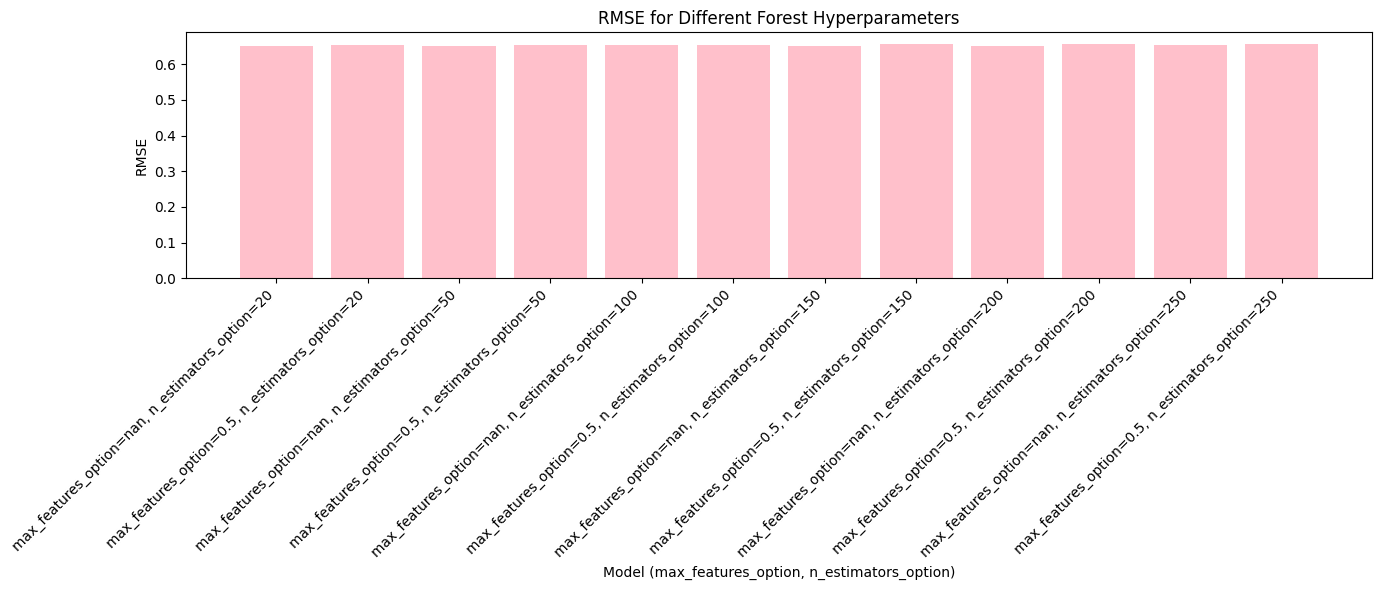

In [32]:
plt.figure(figsize=(14, 6))
plt.bar(errors_df['Params'], errors_df['RMSE'], color='pink')
plt.xticks(rotation=45, ha='right')
plt.title('RMSE for Different Forest Hyperparameters')
plt.xlabel('Model (max_features_option, n_estimators_option)')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

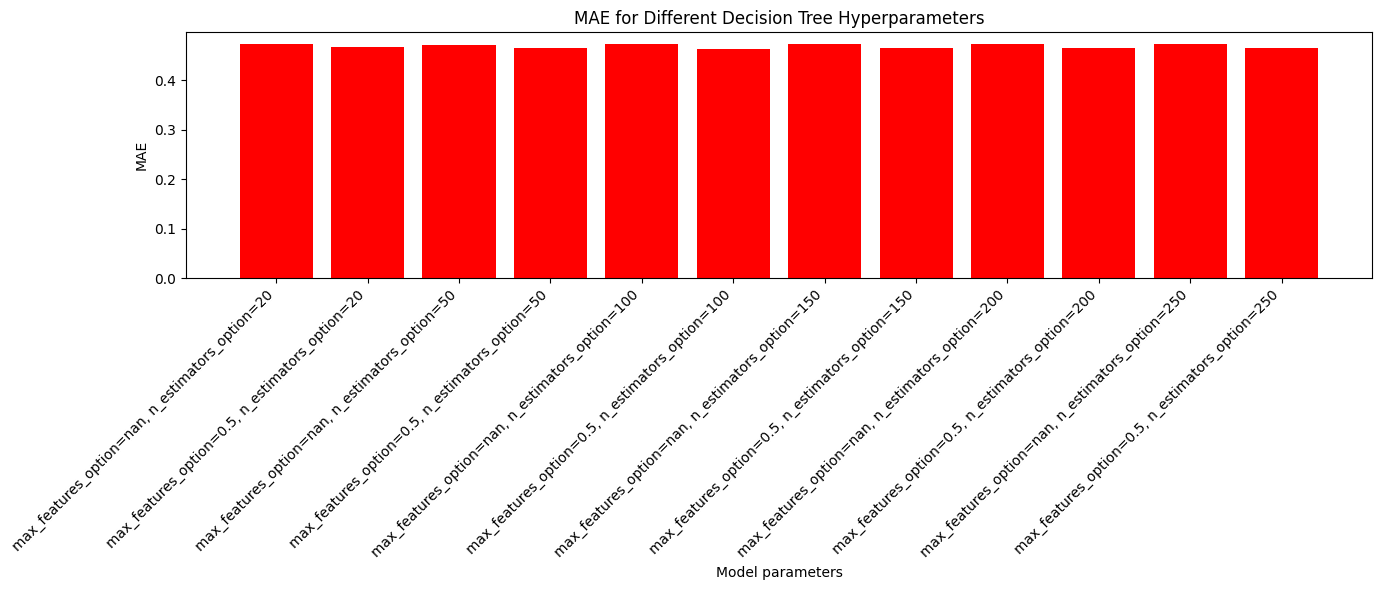

In [33]:
plt.figure(figsize=(14, 6))
plt.bar(errors_df['Params'], errors_df['MAE'], color='red')
plt.xticks(rotation=45, ha='right')
plt.title('MAE for Different Decision Tree Hyperparameters')
plt.xlabel('Model parameters')
plt.ylabel('MAE')
plt.tight_layout()
plt.show()

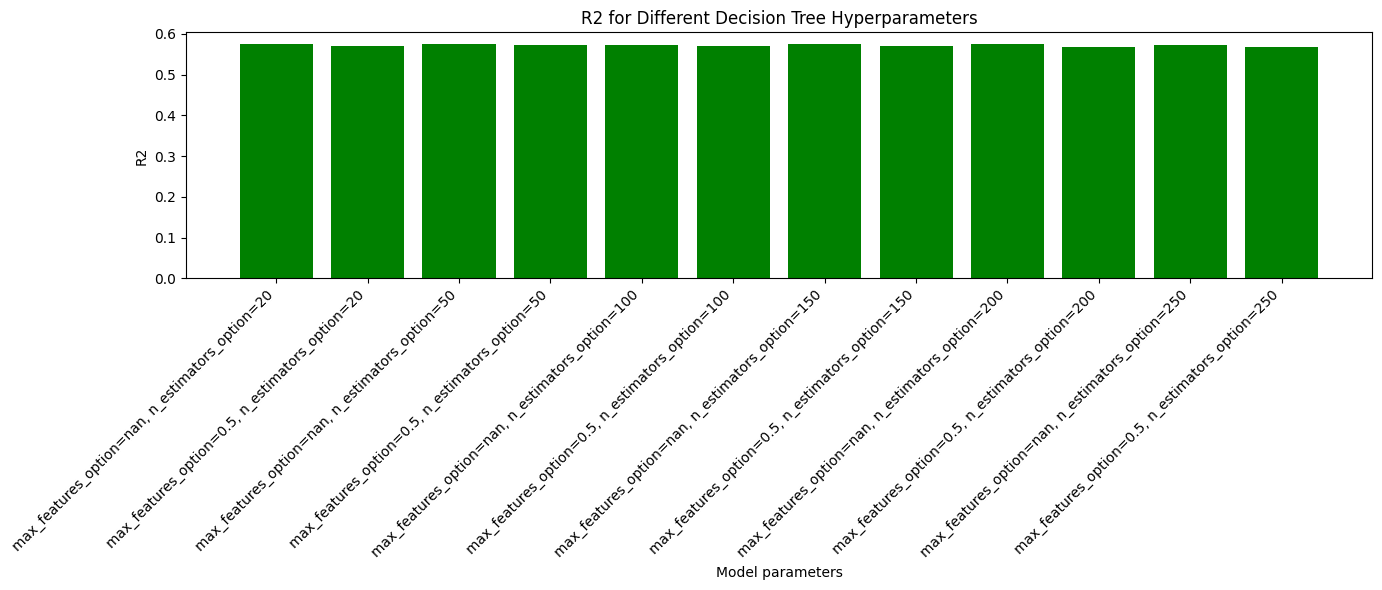

In [34]:
plt.figure(figsize=(14, 6))
plt.bar(errors_df['Params'], errors_df['R2'], color='green')
plt.xticks(rotation=45, ha='right')
plt.title('R2 for Different Decision Tree Hyperparameters')
plt.xlabel('Model parameters')
plt.ylabel('R2')
plt.tight_layout()
plt.show()

Best trade-off choice:

n_estimators=20 and max_features=None

→ R²: 0.575, RMSE: 0.652, MAE: 0.473

- Best R² score
- Lowest RMSE overall
- Fastest model to train and run (only 20 trees)

Close second:

n_estimators=50, max_features=0.5

→ Slightly better MAE (0.465) but worse R² and slightly more computation

Also, we can notice that even though we have bigger forests, the errors are worse. This can be explained by :
- the small number of features, that does not let us have too many possibilities, so the model **overfits** if we have huge forests.

So let use form the random forest with the chosen parameters

In [35]:

# initialize Random Forest
forest_model = RandomForestRegressor(
    max_features=None,    # max_features parameter for split
    n_estimators=20,       # Number of trees in the forest
    max_depth=4,            # Same depth as your tree
    min_samples_leaf=11,    # Same leaf size
    random_state=1
)



# train the model using cv approach
y_pred_forest = cross_val_predict(forest_model, X, y, cv=5)


# 4. Evaluate
rmse_forest = root_mean_squared_error(y, y_pred_forest)
mae_forest = mean_absolute_error(y, y_pred_forest)
r2_forest = r2_score(y, y_pred_forest)

print("Random Forest Performance:")
print(f"MAE:  {mae_forest:.3f}")
print(f"RMSE: {rmse_forest:.3f}")
print(f"R²:   {r2_forest:.3f}")


Random Forest Performance:
MAE:  0.473
RMSE: 0.652
R²:   0.575


### Visualization of reziduals

The resulted errors :
- MAE: 0.473
- RMSE: 0.652
- R² Score: 0.575
 
are very similar to the Normal Tree Model ones, but slightly better.

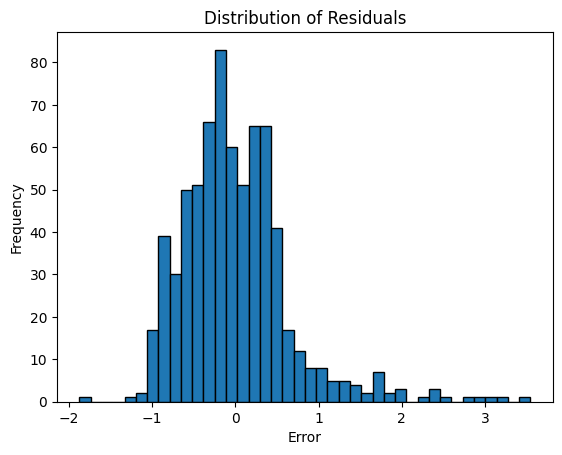

In [36]:
residuals = y - y_pred_forest
plt.hist(residuals, bins=40, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

Considering the step **Aggregation of Predictions: Final prediction is based on averaging values.**, the results are expected.
Normalization helps us a lot.
We have "normal distribution" around 0 (excluding it), which is ideal.

### Advantages and Disadvantages

Advantages:
- our forest performs well, but also reduces overfitting, because we are averaging multiple trees.
- it handles well the large dataset that we are working with.

Disadvantages:
- it is required more computational power, but we took care of this by balancing performance with computational needs.

### Feature importance

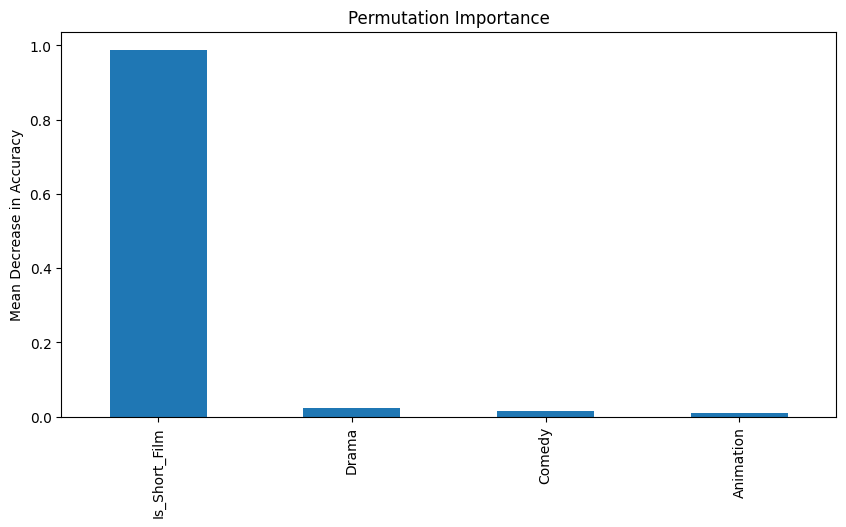

In [37]:
# Refit model on the entire dataset
forest_model.fit(X, y) # needed before applying permutaion_feature importance

perm_importance_result_forest_model = permutation_importance(forest_model, X, y, n_repeats=10, random_state=42)

#plot
pd.Series(perm_importance_result_forest_model.importances_mean, index=X.columns).sort_values(ascending=False).plot(
    kind='bar', title='Permutation Importance', figsize=(10, 5))
plt.ylabel("Mean Decrease in Accuracy")
plt.show()

For our forest, taking into consideration that we use cross-validation, the forest "learns" which features are more important, because now, more trees handle the data and they can reinforce truly strong patterns. 


## Part 4: Model Interpretation & Insights

- Analyze which model performed best and why.
- Suggest potential improvements (e.g., handling non-linearity, feature transformations, or model selection changes).

Let us add in 3 plots all the RMSE, MAE and R2 errors.

### RMSE plot

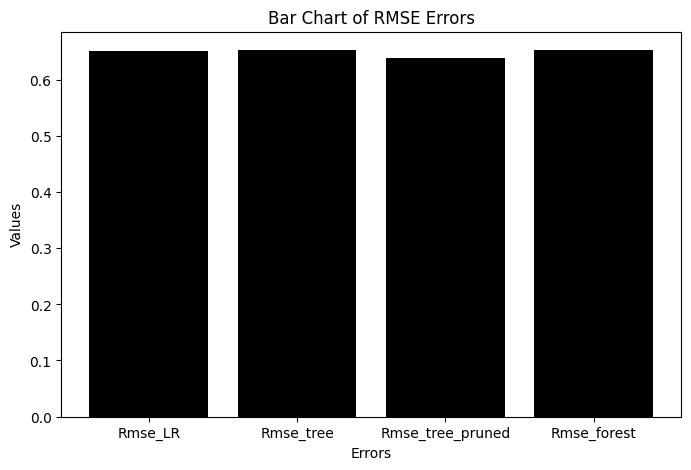

In [38]:
categories_rmse = ['Rmse_LR','Rmse_tree', 'Rmse_tree_pruned','Rmse_forest']
errors = [rmse_LR, rmse_tree_model, rmse_tree_model_p, rmse_forest]

plt.figure(figsize=(8, 5))
plt.bar(categories_rmse, errors, color='black')

plt.xlabel("Errors")
plt.ylabel("Values")
plt.title("Bar Chart of RMSE Errors")

plt.show()

### MAE plot

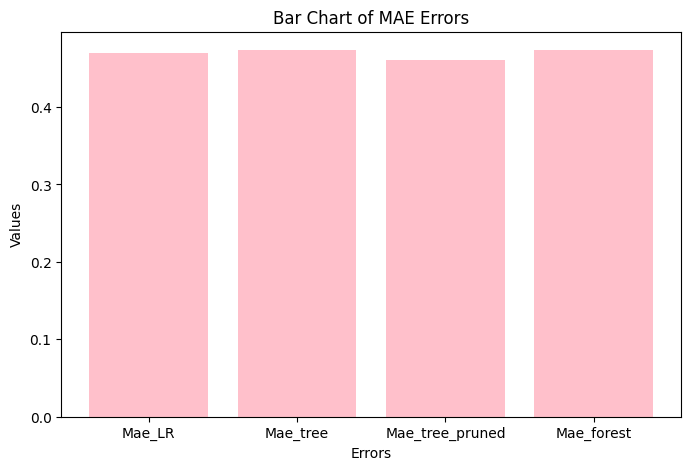

In [39]:
categories_mae = ['Mae_LR','Mae_tree', 'Mae_tree_pruned','Mae_forest']
errors = [mae_LR, mae_tree_model, mae_tree_model_p, mae_forest]

plt.figure(figsize=(8, 5))
plt.bar(categories_mae, errors, color='pink')

plt.xlabel("Errors")
plt.ylabel("Values")
plt.title("Bar Chart of MAE Errors")

plt.show()

### R2 plot

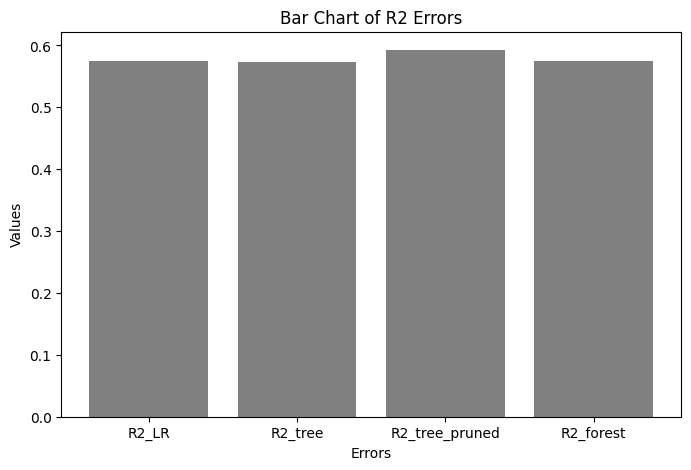

In [40]:
categories_r2 = ['R2_LR','R2_tree', 'R2_tree_pruned','R2_forest']
errors = [r2_LR, r2_tree_model, r2_tree_model_p, r2_forest]

plt.figure(figsize=(8, 5))
plt.bar(categories_r2, errors, color='grey')

plt.xlabel("Errors")
plt.ylabel("Values")
plt.title("Bar Chart of R2 Errors")

plt.show()

Considering that MAE and RMSE need to be as close as possible to 0

And R2 needs to be as close as possible to 1, we have the following ranking on model performance:

1. Pruned tree
2. Linear Regression
3. Random Forest
4. Normal Tree

Because we were very careful with the pruning parameters, it turns out that the pruned tree has the best accuracy.

Linear Regression is the simplest model, but it behaves well, because we have removed outliers, normalized and scaled our data in the data processing part.

The random forest is a powerful model, with a strong architecture, averaging normal trees results and using their power, with the drawback of computational power consumption, so it is better than a single normal tree.


## Handling non-linearity through feature transformation

We can try to add new features, of degree 2, using our initial features (for the **Linear Regression** model). Then we will not have a linear model, but more of a curve, that will maybe help the model predict better.

In [41]:
# Make a pipeline that first adds poly features, then fits a model
model_polyn2 = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                      LinearRegression())

y_pred = cross_val_predict(model_polyn2, X, y, cv=5)

In [42]:
mae = mean_absolute_error(y, y_pred)

rmse = root_mean_squared_error(y, y_pred)  

r2 = r2_score(y, y_pred)

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.4723
RMSE: 0.6539
R²: 0.5724


The results are worse that those of Linear Regression, because a curve may make the model overfit, so this method is not efficient. This is somehow expected, because LR was the 2nd best model already, so we do not really have something to enhance further on.

## Enhance Random Forest Accuracy using through XGBoost model

In [43]:
xgb_model = XGBRegressor(
    n_estimators=100,         #same as RF
    max_depth=4,              #match RF depth
    learning_rate=0.1,        #normal XGBoost's shrinkage rate
    subsample=1.0,            #1.0 = use all rows
    colsample_bytree=0.5,     #same effect as max_features=0.5
    min_child_weight=11,      #eq to min_samples_leaf
    random_state=1,
    objective='reg:squarederror'  # for regression tasks
)

y_pred_xgb = cross_val_predict(model_polyn2, X, y, cv=5)

# Evaluate erors
rmse_xgb = root_mean_squared_error(y, y_pred_xgb)
mae_xgb = mean_absolute_error(y, y_pred_xgb)
r2_xgb = r2_score(y, y_pred_xgb)

print("XGBoost Performance:")
print(f"MAE:  {mae_xgb:.3f}")
print(f"RMSE: {rmse_xgb:.3f}")
print(f"R²:   {r2_xgb:.3f}")

XGBoost Performance:
MAE:  0.472
RMSE: 0.654
R²:   0.572


Random Forest Performance:
- MAE:  0.473
- RMSE: 0.652
- R²:   0.575

So still the random forest performs slightly better:
- features and target relationship is mostly linear , random forest just models it more efficiently.
- Runtime noisyness is averaged better by the random forest

# Bonus Challenge 
- Implement Cross-Validation to ensure model robustness. (Done)
- Use ensemble techniques (e.g., averaging multiple models) to improve prediction accuracy:

We can use a weighted ensable technique to compute the errors.
This way, we can give more importance (weight) to the model that performed better, because they will be used more in practice.
We can use weights considering the ranking before:
- for y_pred_tree_model_p give an importance of 40%
- for y_pred_LR 30%
- for y_pred_forest 20%
- for y_pred_tree_model 10%

In [44]:
#weighted ensemble
ensemble_pred = (
    0.4 * y_pred_tree_model_p +
    0.3 * y_pred_LR  +
    0.2 * y_pred_forest +
    0.1 * y_pred_tree_model
)

#eval errors
mae = mean_absolute_error(y, ensemble_pred)
rmse = root_mean_squared_error(y, ensemble_pred)
r2 = r2_score(y, ensemble_pred)

print("Weighted Ensemble Performance:")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

Weighted Ensemble Performance:
MAE:  0.466
RMSE: 0.645
R²:   0.584


These are the final results.